In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import linregress

In [2]:
ecar_df = pd.read_csv("./Database/Cheapestelectriccars-EVDatabase.csv")
ecar_df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [3]:
print(ecar_df.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [4]:
#Clean the blank spaces
ecar_df = ecar_df.fillna('0')
#Create a new column
ecar_df.insert(loc=0, column="Manufacturer", value=ecar_df.Name.str.split(' ', n=1, expand=True)[0])
# Remove the first word from the 'Name' column
ecar_df['Name'] = ecar_df.Name.str.split(' ', n=1, expand=True)[1]

In [5]:
ecar_df.dtypes

Manufacturer       object
Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object

In [6]:
#Subtitle column
Subtitle=[]
for item in ecar_df['Subtitle']:
    Subtitle.append(float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ','')))
ecar_df['Subtitle']=Subtitle

In [7]:
#Acceleration column
Acceleration=[]
for item in ecar_df['Acceleration']:
    Acceleration.append(float(item.replace(' sec','')))
ecar_df['Acceleration']=Acceleration

In [8]:
#TopSpeed column
TopSpeed=[]
for item in ecar_df['TopSpeed']:
    TopSpeed.append(int(item.replace(' km/h','')))
ecar_df['TopSpeed']=TopSpeed

In [9]:
#Range column
Range=[]
for item in ecar_df['Range']:
    Range.append(int(item.replace(' km','')))
ecar_df['Range']=Range

In [10]:
#Efficiency column
Efficiency=[]
for item in ecar_df['Efficiency']:
    Efficiency.append(int(item.replace(' Wh/km','')))
ecar_df['Efficiency']=Efficiency

In [11]:
#FastChargeSpeed column
FastChargeSpeed=[]
for item in ecar_df['FastChargeSpeed']:
    FastChargeSpeed.append(int(item.replace(' km/h','').replace('-','0')))
ecar_df['FastChargeSpeed']=FastChargeSpeed

In [12]:
#Clean dataframe
#Remove currency signs
PriceinUK=[]
for item in ecar_df['PriceinUK']:
    PriceinUK.append(int(item.replace('£','').replace(',','')))
ecar_df['PriceinUK']=PriceinUK

PriceinGermany=[]
for item in ecar_df['PriceinGermany']:
    PriceinGermany.append(int(item.replace('€','').replace(',','')))
ecar_df['PriceinGermany']=PriceinGermany

In [13]:
ecar_df = ecar_df.rename(columns={'Name':'Model',
                                  'Subtitle':'Subtitle(kWh)',
                                  'Acceleration':'Acceleration(sec)',
                                  'TopSpeed':'TopSpeed (km/h)',
                                  'Range':'Range(km)',
                                  'Efficiency':'Efficiency(Wh/km)',
                                  'FastChargeSpeed':'FastChargeSpeed(km/h)',
                                  'PriceinGermany':'Price(€)',
                                  'PriceinUK':'Price(£)'
                                 })
ecar_df.head()

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Price(£)
0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


In [14]:
print(ecar_df.columns.tolist())

['Manufacturer', 'Model', 'Subtitle(kWh)', 'Acceleration(sec)', 'TopSpeed (km/h)', 'Range(km)', 'Efficiency(Wh/km)', 'FastChargeSpeed(km/h)', 'Drive', 'NumberofSeats', 'Price(€)', 'Price(£)']


In [15]:
ecar_df.nunique()

Manufacturer              37
Model                    174
Subtitle(kWh)             61
Acceleration(sec)         77
TopSpeed (km/h)           35
Range(km)                 68
Efficiency(Wh/km)         80
FastChargeSpeed(km/h)     69
Drive                      3
NumberofSeats              4
Price(€)                 152
Price(£)                 124
dtype: int64

## Rating based in the information

In [16]:
d = 5
# Battery Capacity
c = 4
# TopSpeed
a = 3 
# Efficiency
e = 2
# Range
b = 1
# FastChargeSpeed

In [17]:
rating = (ecar_df["Efficiency(Wh/km)"]*a) + (ecar_df["FastChargeSpeed(km/h)"]*b) + (ecar_df["TopSpeed (km/h)"]*c) + (ecar_df["Subtitle(kWh)"]*d) +(ecar_df["Range(km)"]*e)
ecar_df_r = ecar_df

In [18]:
ecar_df_r["Rating"] = rating

In [19]:
rat = ecar_df_r.sort_values(by='Rating', ascending=False)
rat.head(10)

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Price(£),Rating
19,Tesla,Roadster,200.0,2.1,410,970,206,920,All Wheel Drive,4,215000,189000,6118.0
59,Tesla,Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,75000,68000,4851.0
90,Lucid,Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,140000,125000,4831.0
91,Lucid,Air Touring,85.0,3.4,250,530,160,1390,All Wheel Drive,5,95000,90000,4355.0
92,Lucid,Air Pure,85.0,4.2,200,540,157,1410,Rear Wheel Drive,5,80000,70000,4186.0
124,Tesla,Model S Plaid,90.0,2.1,322,535,168,800,All Wheel Drive,5,126990,118980,4112.0
149,Mercedes,EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,106374,95000,4003.0
150,Mercedes,EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,135529,115000,3930.0
123,Tesla,Model S Long Range,90.0,3.2,250,555,162,830,All Wheel Drive,5,86990,83980,3876.0
47,Porsche,Taycan 4S Plus,83.7,4.0,250,435,192,910,All Wheel Drive,4,113008,88193,3774.5


In [20]:
dollar = ecar_df_r["Price(€)"]*1.09
ecar_df_r["Pricein$"] = dollar

In [21]:
ecar_df_r

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Price(£),Rating,Pricein$
0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,2289.0,46859.10
1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,1577.0,0.00
2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,1918.0,32689.10
3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,3275.5,0.00
4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,3743.5,203106.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,MG,Marvel R,65.0,7.9,200,340,191,390,Rear Wheel Drive,5,40000,0,2768.0,43600.00
176,Tesla,Model 3 Long Range Dual Motor,76.0,4.4,233,490,155,820,All Wheel Drive,5,53560,0,3577.0,58380.40
177,MG,MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,0,26495,2549.0,0.00
178,Audi,Q4 e-tron 45 quattro,76.6,6.9,180,385,199,470,All Wheel Drive,5,50900,0,2940.0,55481.00


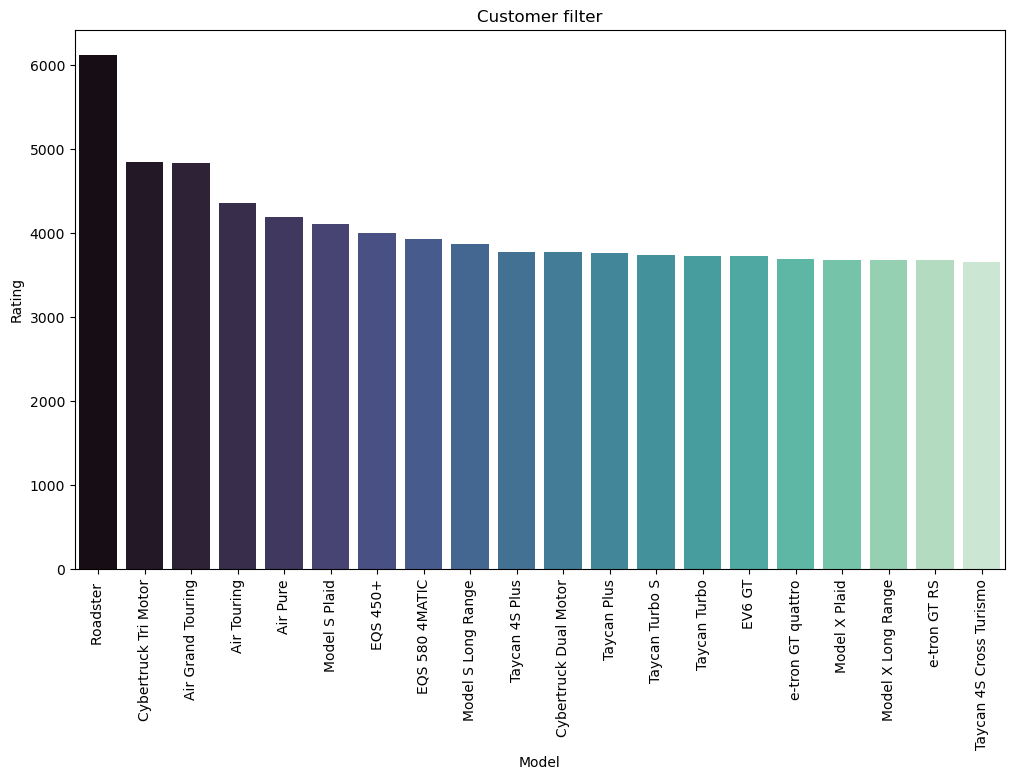

In [22]:
plt.figure(figsize = (12,7))
data_rat = ecar_df_r[["Model","Rating","Pricein$"]].sort_values(by = ["Rating"],ascending = False)
data_rat_20 = data_rat[:20]
sns.barplot(x = data_rat_20["Model"],y = data_rat_20["Rating"],palette = "mako" )

plt.xticks(rotation = "vertical")
plt.xlabel("Model")
plt.title("Customer filter")
plt.savefig("rating.png")

Text(0.5, 1.0, 'Price Top 20')

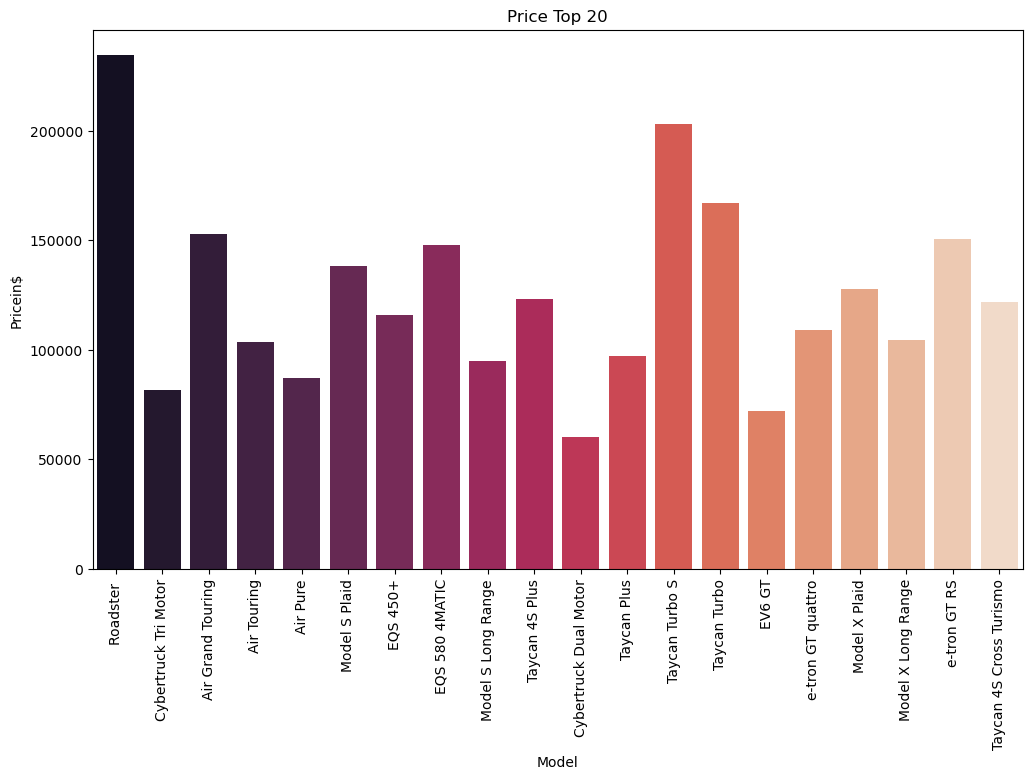

In [23]:
plt.figure(figsize = (12,7))
sns.barplot(x = data_rat_20["Model"],y = data_rat_20["Pricein$"],palette = "rocket" )
plt.xticks(rotation = "vertical")
plt.title("Price Top 20")

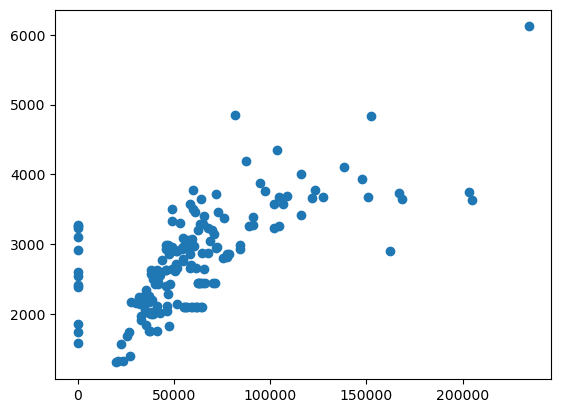

In [24]:
price = ecar_df_r.iloc[:,13]
rating = ecar_df_r.iloc[:,12]
plt.scatter(price,rating)

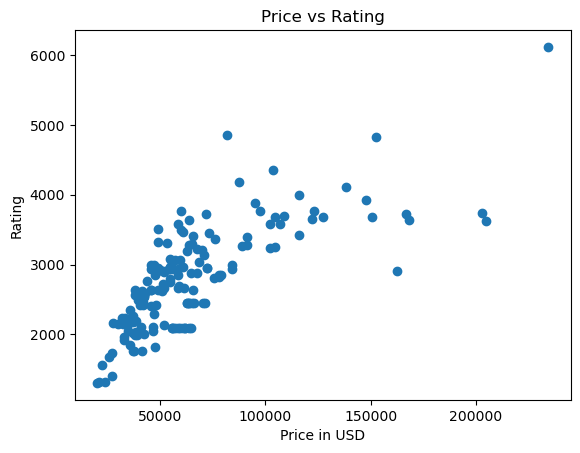

In [25]:
filtro = ecar_df_r['Pricein$']!= 0
new_filter = ecar_df_r[filtro]
price = new_filter.iloc[:,13]
rating = new_filter.iloc[:,12]
plt.scatter(price,rating)
plt.title("Price vs Rating")
plt.xlabel("Price in USD")
plt.ylabel("Rating")
plt.style.use("fivethirtyeight")

## Without Rating

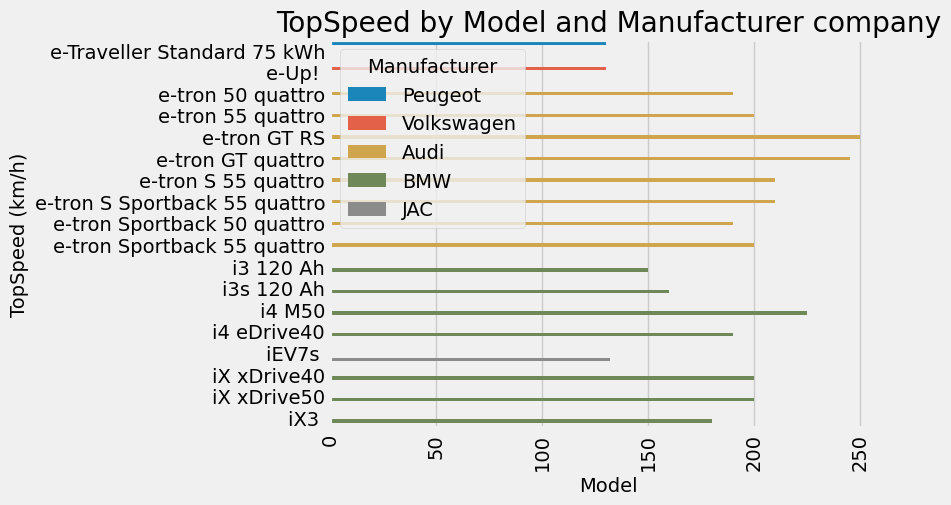

In [26]:
df_sorted = ecar_df.sort_values('Model')
df_top_20 = df_sorted.tail(20)
sns.barplot(data=df_top_20, x='TopSpeed (km/h)', y='Model', hue='Manufacturer')
plt.xlabel('Model')
plt.ylabel('TopSpeed (km/h)')
plt.title('TopSpeed by Model and Manufacturer company')
plt.xticks(rotation='vertical')
plt.show()

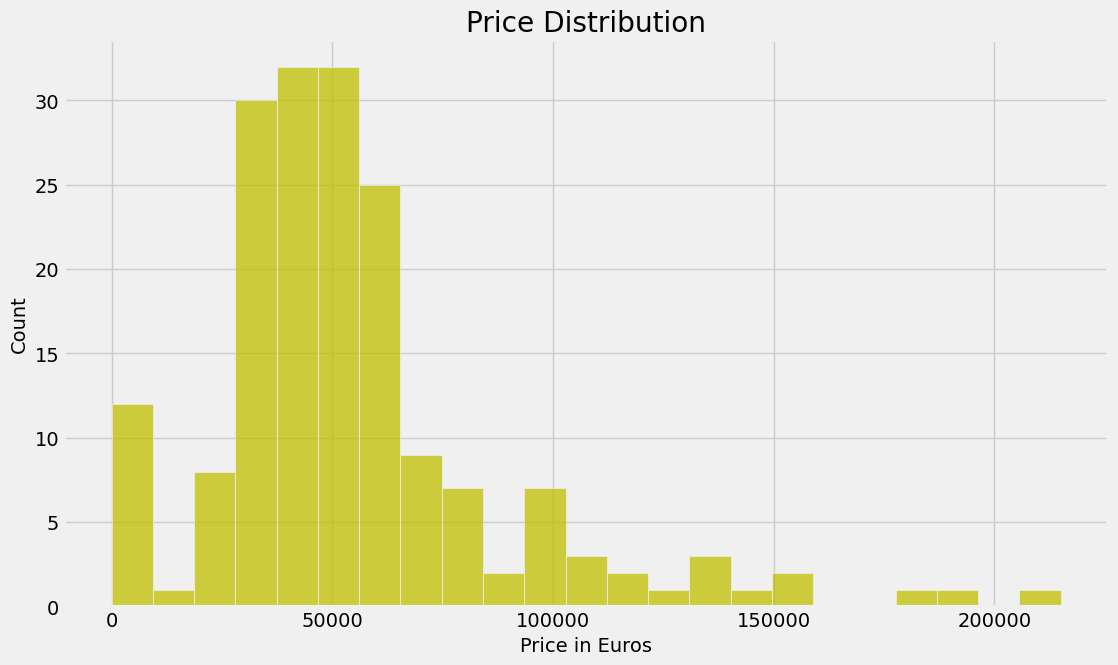

In [27]:
plt.figure(figsize = (12,7))
sns.histplot(data=ecar_df, x="Price(€)",color = "y")
plt.xlabel("Price in Euros")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()

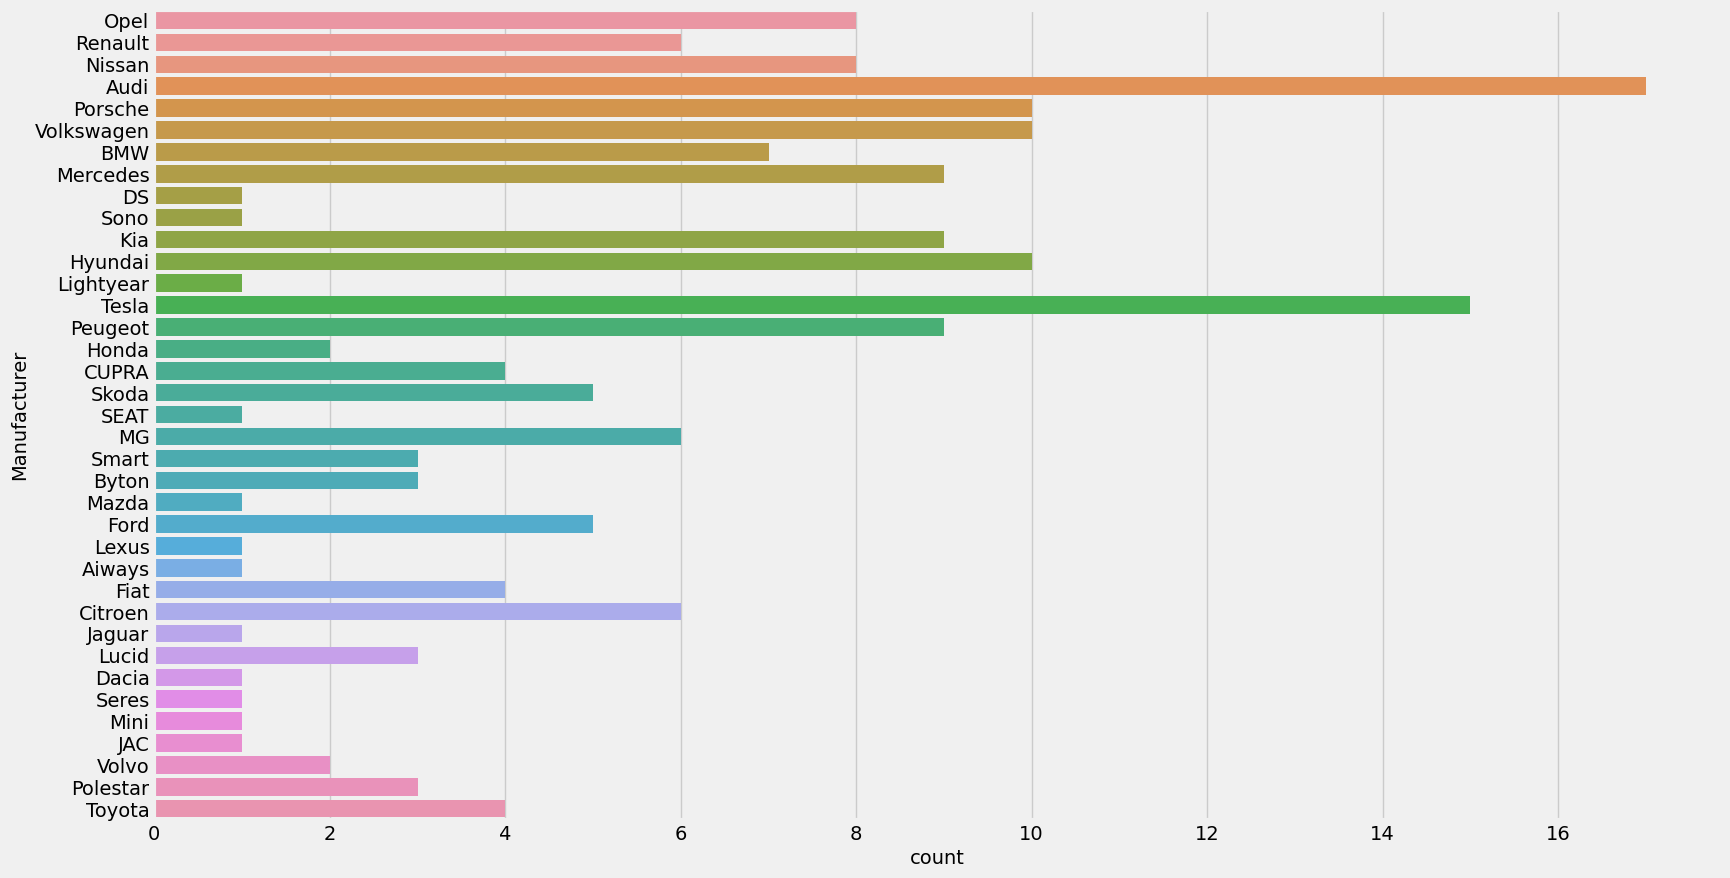

In [28]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = ecar_df)
plt.show()

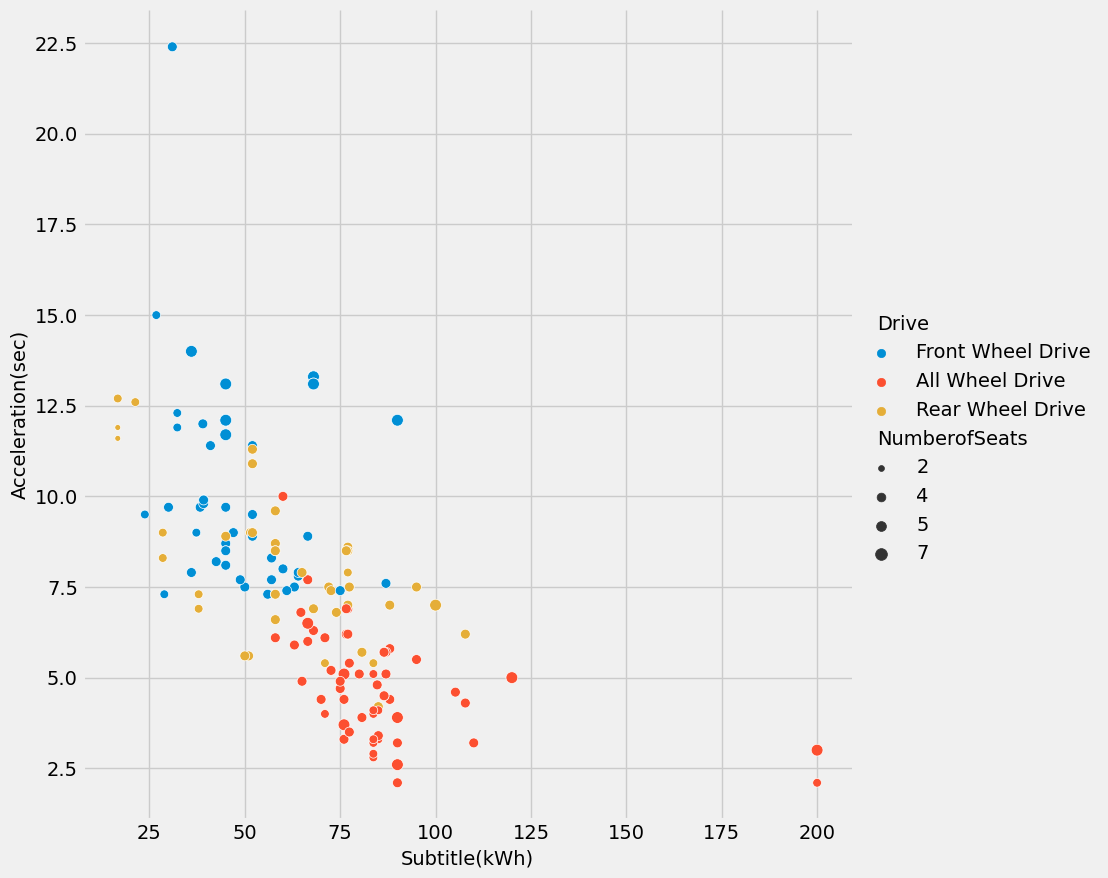

In [29]:
sns.relplot(x="Subtitle(kWh)", y="Acceleration(sec)", height=9,size='NumberofSeats',hue="Drive",data=ecar_df)
plt.show()

## Price vs Utility

In [30]:
# Saved clean DATASET to CSV in project REPO for collaboration
clean_ecar_df = ecar_df.copy()
clean_ecar_df.to_csv('clean_ecar_dataset.csv', index=True)

In [31]:
clean_ecar_df = pd.read_csv("./clean_ecar_dataset.csv")
clean_ecar_df.head()

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Price(£),Rating,Pricein$
0,0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,2289.0,46859.10
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,1577.0,0.00
2,2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,1918.0,32689.10
3,3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,3275.5,0.00
4,4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,3743.5,203106.24


In [32]:
clean_ecar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             180 non-null    int64  
 1   Manufacturer           180 non-null    object 
 2   Model                  180 non-null    object 
 3   Subtitle(kWh)          180 non-null    float64
 4   Acceleration(sec)      180 non-null    float64
 5   TopSpeed (km/h)        180 non-null    int64  
 6   Range(km)              180 non-null    int64  
 7   Efficiency(Wh/km)      180 non-null    int64  
 8   FastChargeSpeed(km/h)  180 non-null    int64  
 9   Drive                  180 non-null    object 
 10  NumberofSeats          180 non-null    int64  
 11  Price(€)               180 non-null    int64  
 12  Price(£)               180 non-null    int64  
 13  Rating                 180 non-null    float64
 14  Pricein$               180 non-null    float64
dtypes: flo

In [33]:
clean_ecar_df.groupby('Manufacturer').mean()['Range(km)']

C:\Users\osvso\AppData\Local\Temp\ipykernel_10228\893932480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_ecar_df.groupby('Manufacturer').mean()['Range(km)']


Manufacturer
Aiways        335.000000
Audi          359.411765
BMW           375.714286
Byton         371.666667
CUPRA         355.000000
Citroen       223.333333
DS            250.000000
Dacia         170.000000
Fiat          226.250000
Ford          389.000000
Honda         170.000000
Hyundai       328.500000
JAC           225.000000
Jaguar        365.000000
Kia           346.666667
Lexus         260.000000
Lightyear     575.000000
Lucid         576.666667
MG            310.833333
Mazda         170.000000
Mercedes      406.111111
Mini          185.000000
Nissan        327.500000
Opel          244.375000
Peugeot       223.888889
Polestar      390.000000
Porsche       403.000000
Renault       250.833333
SEAT          205.000000
Seres         270.000000
Skoda         369.000000
Smart          96.666667
Sono          260.000000
Tesla         504.333333
Toyota        226.250000
Volkswagen    342.000000
Volvo         340.000000
Name: Range(km), dtype: float64

In [34]:
clean_ecar_df.nunique()

Unnamed: 0               180
Manufacturer              37
Model                    174
Subtitle(kWh)             61
Acceleration(sec)         77
TopSpeed (km/h)           35
Range(km)                 68
Efficiency(Wh/km)         80
FastChargeSpeed(km/h)     69
Drive                      3
NumberofSeats              4
Price(€)                 152
Price(£)                 124
Rating                   142
Pricein$                 152
dtype: int64

In [35]:
# Create 2 new data sets for Germany and UK 

#take clean_ecar_df and select only cars with price in pounds column
new_data_uk = clean_ecar_df.drop(columns=['Price(€)']).copy()
new_data_uk.head()

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(£),Rating,Pricein$
0,0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,0,2289.0,46859.10
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,31680,1577.0,0.00
2,2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,25995,1918.0,32689.10
3,3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,79900,3275.5,0.00
4,4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,138830,3743.5,203106.24


In [36]:
#take clean_ecar_df and select only cars with price in euros column
new_data_germany = clean_ecar_df.drop(columns=['Price(£)']).copy()
new_data_germany.head()

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Rating,Pricein$
0,0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,2289.0,46859.10
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,1577.0,0.00
2,2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,1918.0,32689.10
3,3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,3275.5,0.00
4,4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,3743.5,203106.24


In [37]:
# Sort the column 'Range(km)' by 'Low' and 'High'
# Take new_data_uk + sorting function
sorted_range_uk_df = new_data_uk.sort_values(by=['Range(km)'])
sorted_range_uk_df

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(£),Rating,Pricein$
41,41,Smart,EQ forfour,16.7,12.7,130,95,176,0,Rear Wheel Drive,4,19795,1321.5,20840.80
40,40,Smart,EQ fortwo cabrio,16.7,11.9,130,95,176,0,Rear Wheel Drive,2,21620,1321.5,23674.80
39,39,Smart,EQ fortwo coupe,16.7,11.6,130,100,167,0,Rear Wheel Drive,2,19200,1304.5,20121.40
64,64,Renault,Twingo Electric,21.3,12.6,135,130,164,0,Rear Wheel Drive,4,0,1398.5,27021.10
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,31680,1577.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,Mercedes,EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,115000,3930.0,147726.61
149,149,Mercedes,EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,95000,4003.0,115947.66
90,90,Lucid,Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,125000,4831.0,152600.00
59,59,Tesla,Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,68000,4851.0,81750.00


C:\Users\osvso\AppData\Local\Temp\ipykernel_10228\2324553889.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_pounds = sorted_range_uk_df.groupby('Manufacturer').mean()['Price(£)']


<Axes: xlabel='Manufacturer'>

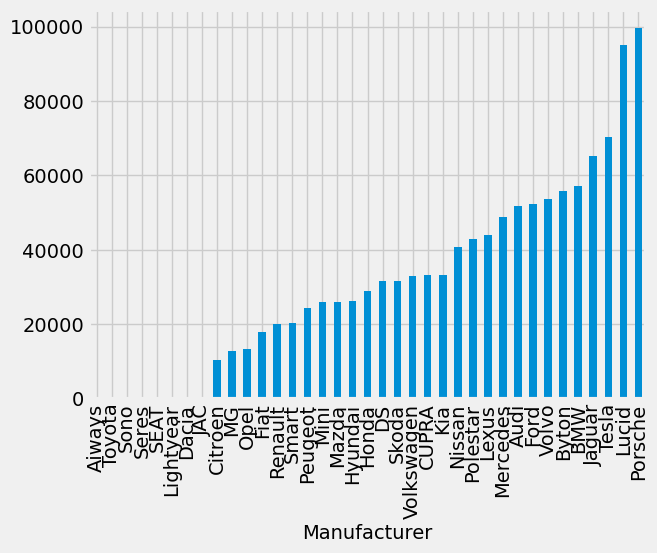

In [38]:
# Average price in Pounds
avg_price_pounds = sorted_range_uk_df.groupby('Manufacturer').mean()['Price(£)']
avg_price_pounds.sort_values().plot(kind='bar')


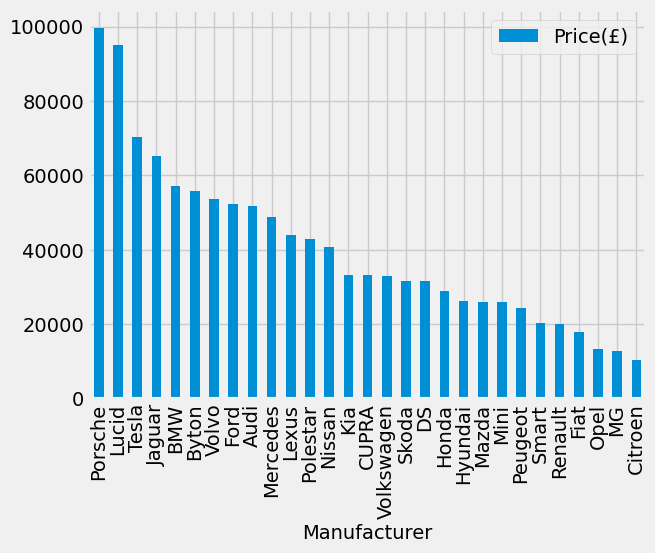

In [39]:
# Price in pounds
avg_pound=pd.DataFrame(avg_price_pounds, columns = ['Price(£)'])
avg_pound = avg_pound[avg_pound['Price(£)']!=0]
avg_pound.sort_values(by='Price(£)', ascending=False).plot(kind='bar') 
plt.savefig("AveragePriceInPounds.png")
plt.show()
# add save fig
# create same but in euros as well

In [40]:
# Take new_data_germany + sorting function
sorted_range_germany_df = new_data_germany.sort_values(by=['Range(km)'])
sorted_range_germany_df

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Rating,Pricein$
41,41,Smart,EQ forfour,16.7,12.7,130,95,176,0,Rear Wheel Drive,4,19120,1321.5,20840.80
40,40,Smart,EQ fortwo cabrio,16.7,11.9,130,95,176,0,Rear Wheel Drive,2,21720,1321.5,23674.80
39,39,Smart,EQ fortwo coupe,16.7,11.6,130,100,167,0,Rear Wheel Drive,2,18460,1304.5,20121.40
64,64,Renault,Twingo Electric,21.3,12.6,135,130,164,0,Rear Wheel Drive,4,24790,1398.5,27021.10
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,1577.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,Mercedes,EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,135529,3930.0,147726.61
149,149,Mercedes,EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,106374,4003.0,115947.66
90,90,Lucid,Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,140000,4831.0,152600.00
59,59,Tesla,Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,75000,4851.0,81750.00


C:\Users\osvso\AppData\Local\Temp\ipykernel_10228\2586075044.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_euros = sorted_range_germany_df.groupby('Manufacturer').mean()['Price(€)']


<Axes: xlabel='Manufacturer'>

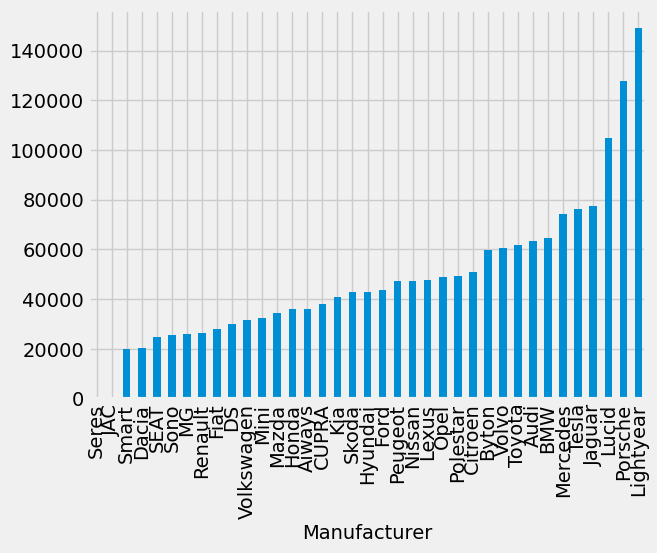

In [41]:
# Average price in Euros
avg_price_euros = sorted_range_germany_df.groupby('Manufacturer').mean()['Price(€)']
avg_price_euros.sort_values().plot(kind='bar')

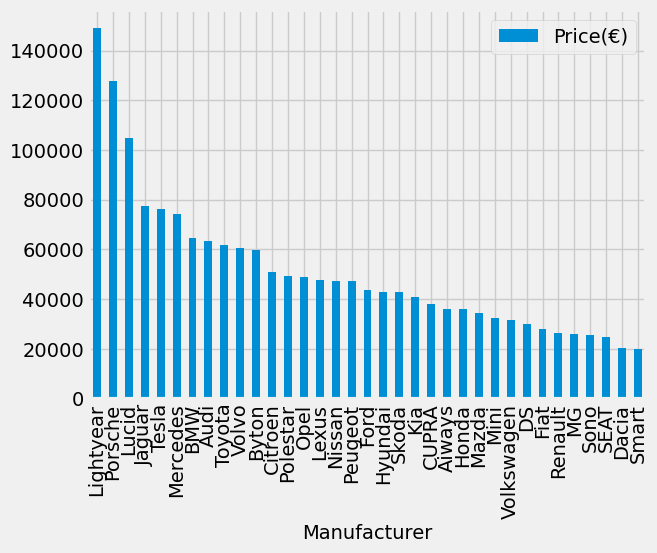

In [42]:
# Price in Euros
avg_euro=pd.DataFrame(avg_price_euros, columns = ['Price(€)'])
avg_euro = avg_euro[avg_euro['Price(€)']!=0]
avg_euro.sort_values(by='Price(€)', ascending=False).plot(kind='bar') 
plt.savefig("AvgPriceEuros.png")
plt.show()

# add save fig
# create same but in euros as well

In [43]:
# Take new_data_germany + sorting function
sorted_range_germany_df = new_data_germany.sort_values(by=['Range(km)'])
sorted_range_germany_df

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Rating,Pricein$
41,41,Smart,EQ forfour,16.7,12.7,130,95,176,0,Rear Wheel Drive,4,19120,1321.5,20840.80
40,40,Smart,EQ fortwo cabrio,16.7,11.9,130,95,176,0,Rear Wheel Drive,2,21720,1321.5,23674.80
39,39,Smart,EQ fortwo coupe,16.7,11.6,130,100,167,0,Rear Wheel Drive,2,18460,1304.5,20121.40
64,64,Renault,Twingo Electric,21.3,12.6,135,130,164,0,Rear Wheel Drive,4,24790,1398.5,27021.10
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,1577.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,Mercedes,EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,135529,3930.0,147726.61
149,149,Mercedes,EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,106374,4003.0,115947.66
90,90,Lucid,Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,140000,4831.0,152600.00
59,59,Tesla,Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,75000,4851.0,81750.00


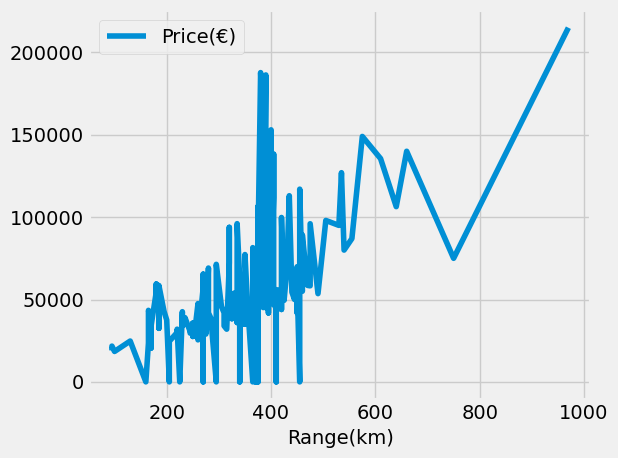

In [44]:
# Create bar charts 'Model VS Range(km)' from sorted range Germany
sorted_range_germany_df.plot.line(x= 'Range(km)', y= 'Price(€)')
plt.tight_layout()
plt.savefig("ModelVsRangeEuros.png")

plt.show()

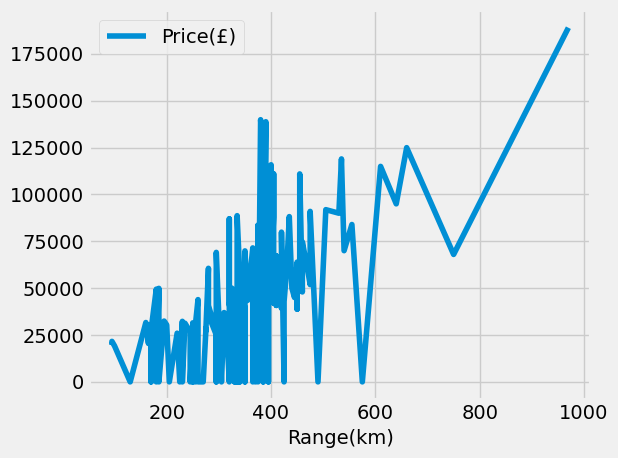

In [45]:
# Create bar charts 'Model VS Range(km)' from sorted range UK
sorted_range_uk_df.plot.line(x= 'Range(km)', y= 'Price(£)')
plt.tight_layout()
plt.savefig("ModelVsRangePounds.png")

plt.show()

In [46]:
# Sort the 'price comparison' by 'Low' and 'High'
# take the new_data_uk and sort price in pounds 
sorted_price_uk_df = new_data_uk.sort_values(by=['Price(£)'])
sorted_price_uk_df

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(£),Rating,Pricein$
0,0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,0,2289.0,46859.10
110,110,Opel,Zafira-e Life M 75 kWh,68.0,13.3,130,270,252,290,Front Wheel Drive,7,0,2446.0,65182.00
108,108,Opel,Zafira-e Life M 50 kWh,45.0,12.1,130,185,243,250,Front Wheel Drive,7,0,2094.0,58642.00
107,107,Opel,Zafira-e Life S 50 kWh,45.0,12.1,130,185,243,250,Front Wheel Drive,7,0,2094.0,61803.00
106,106,Citroen,e-SpaceTourer XL 75 kWh,68.0,13.3,130,270,252,290,Front Wheel Drive,7,0,2446.0,63470.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,Tesla,Model S Plaid,90.0,2.1,322,535,168,800,All Wheel Drive,5,118980,4112.0,138419.10
90,90,Lucid,Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,125000,4831.0,152600.00
4,4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,138830,3743.5,203106.24
136,136,Porsche,Taycan Turbo S Cross Turismo,83.7,2.9,250,380,220,790,All Wheel Drive,4,139910,3628.5,204643.14


In [47]:
# take the new_data_germany and sort price in euros
sorted_price_germany_df = new_data_germany.sort_values(by=['Price(€)'])
sorted_price_germany_df

,Unnamed: 0,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Price(€),Rating,Pricein$
119,119,Seres,3,52.0,8.9,155,270,193,390,Front Wheel Drive,5,0,2389.0,0.00
1,1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,1577.0,0.00
128,128,JAC,iEV7s,39.0,12.0,132,225,173,160,Front Wheel Drive,5,0,1852.0,0.00
3,3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,3275.5,0.00
177,177,MG,MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,0,2549.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,38,Porsche,Taycan Turbo,83.7,3.2,260,400,209,840,All Wheel Drive,4,153016,3725.5,166787.44
135,135,Porsche,Taycan Turbo Cross Turismo,83.7,3.3,250,385,217,800,All Wheel Drive,4,154444,3639.5,168343.96
4,4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,3743.5,203106.24
136,136,Porsche,Taycan Turbo S Cross Turismo,83.7,2.9,250,380,220,790,All Wheel Drive,4,187746,3628.5,204643.14


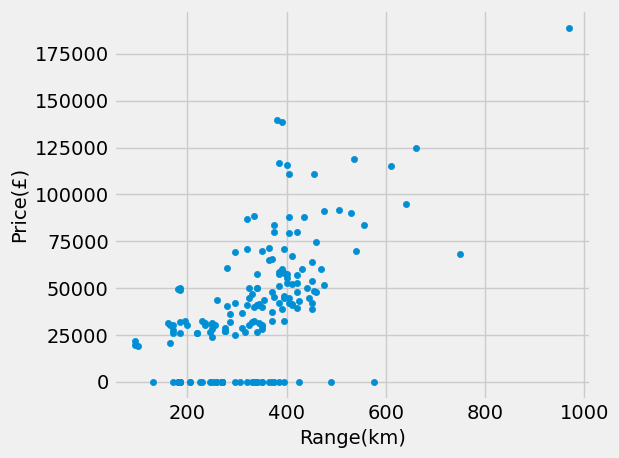

In [48]:
# Create bar charts 'Model VS Price' in Pounds UK
uk_price_plot = sorted_price_uk_df.plot.scatter(x= 'Range(km)', y= 'Price(£)')
plt.tight_layout()
plt.show()

<Axes: xlabel='Range(km)', ylabel='Price(€)'>

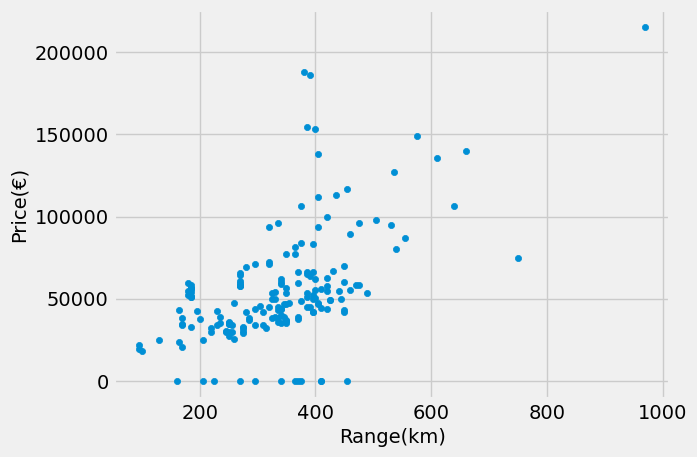

In [49]:
# Create bar charts 'Model VS Price' in Euros Germany
sorted_price_germany_df.plot.scatter(x= 'Range(km)', y= 'Price(€)')

In [50]:
#Display the correlation and linear regression in 'Range(km)' VS 'Price'
# Take sorted_price_uk_df + corr of price in pound and range
corr_uk_range_price = sorted_price_uk_df.corr()


# Take sorted_price_germany_df + corr of price in euros and range
corr_germany_range_price = sorted_price_germany_df.corr()

C:\Users\osvso\AppData\Local\Temp\ipykernel_10228\2717141944.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_uk_range_price = sorted_price_uk_df.corr()
C:\Users\osvso\AppData\Local\Temp\ipykernel_10228\2717141944.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_germany_range_price = sorted_price_germany_df.corr()


In [51]:
# Define a function to create Linear Regression plots

def plotlnreg(x_values, y_values, figtitle, title, text_coords,fig): 
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coords,fontsize=15,color="red")
    plt.title(figtitle)
    plt.xlabel('Range(km)')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(fig)
    plt.show()    

The r-squared is: 0.3853393113944489


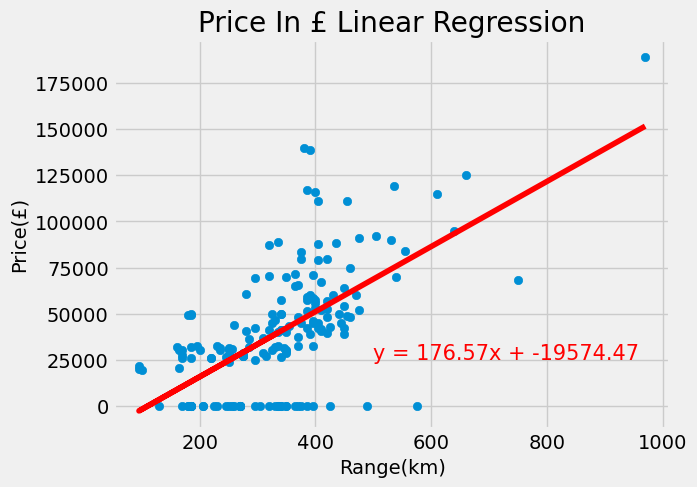

In [52]:
# Price in £ Liean Regression
x_values= sorted_price_uk_df['Range(km)']
y_values= sorted_price_uk_df['Price(£)']
plotlnreg(x_values, y_values, 'Price In £ Linear Regression', 'Price(£)', (500, 25000), 'LinearRegPounds.png')

The r-squared is: 0.32380309331805857


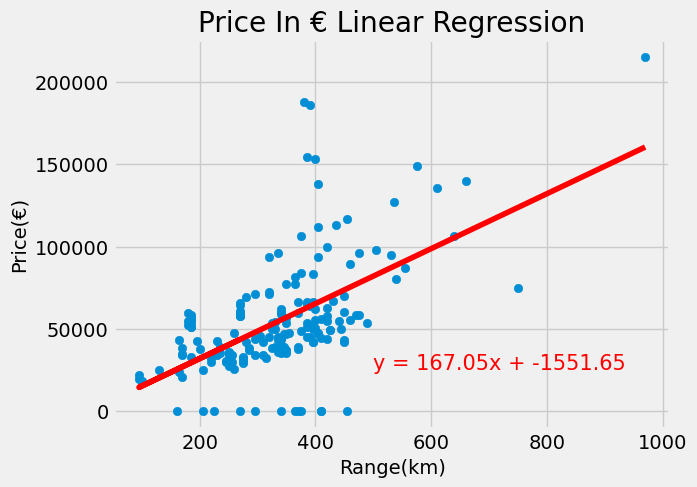

In [53]:
# Price in € Liean Regression
x_values= sorted_price_germany_df['Range(km)']
y_values= sorted_price_germany_df['Price(€)']
plotlnreg(x_values, y_values, 'Price In € Linear Regression', 'Price(€)', (500, 25000), 'LinregEuros.png')